가설: 백신의 접종률이 증가할수록 사망률 또는 전체 확진자 대비 중증 환자들의 수는 감소한다. 

In [2]:
import requests 
from bs4 import BeautifulSoup
def import_data(start_date,end_date):
    url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
    params ={'serviceKey' : '1BS8qGfbuuLCG5nQ9QpOP8CQb/Eyz9oQ7j9jC4FylCgLRiLC/yIQrBy6YwnXqxKmqcZQIyw+DvcFWOfTvWIJCg==',
             'pageNo' : '1', 
             'numOfRows' : '10', 
             'startCreateDt' : start_date, 
             'endCreateDt' : end_date }

    response = requests.get(url, params=params)
    data=BeautifulSoup(response.text, "lxml")
    items=data.find_all("item")
    DEFCNT = []
    DEATHCNT=[]
    date = []
    for item in items:
        if item.find("gubun").get_text() == "합계":
            DEFCNT.append(int(item.find("defcnt").get_text()))
            DEATHCNT.append(int(item.find("deathcnt").get_text()))
            date.append(item.find("stdday").get_text())
    DEFCNT.reverse()
    DEATHCNT.reverse()
    date.reverse()
    return DEFCNT, DEATHCNT,date
            

C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


2021년 02월 26일 00시
2021년 05월 14일 00시
2021년 12월 02일 00시


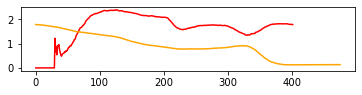

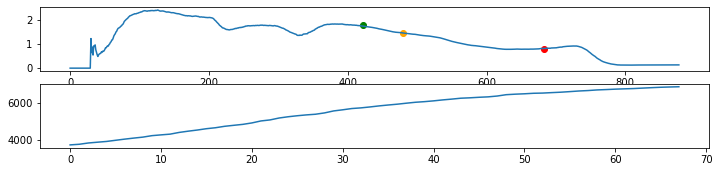

In [3]:
import matplotlib.pyplot as plt
DEFCNT,DEATHCNT,date=import_data("20200120","20210225")
DEFCNT2,DEATHCNT2,date2=import_data("20210226","2022525")
Mortality=[]

Mortality2=[]
idx = len(date)
idx2=len(date)
for k in range(1,len(date2)):
    if ("2021년 12월 02일" in date2[k]):
        idx += k
    if ("2021년 05월 14일" in date2[k]):
        idx2+=k
for i in range(1,len(date)):
    #print(sum_P,sum_Death)
    Mortality.append((DEATHCNT[i]/DEFCNT[i])*100)
#print(Mortality)
                     
for j in range(0,len(date2)):
    Mortality2.append((DEATHCNT2[j]/DEFCNT2[j])*100)
#print()
#print(Mortality2)
#2차 접종-750일
DeathOmicron=[]
x1 = [i for i in range(len(Mortality))]
x2 = [i for  i in range(len(Mortality2))]
ve_X = [422]
ve_Y =  [Mortality2[0]]
print(date2[0])
ve_X2 = [idx2]
ve_Y2 =  [Mortality2[idx2-len(date)]]
print(date2[idx2-len(date)])
o_X=[idx]
o_Y=[Mortality2[idx-len(date)]]
print(date2[idx-len(date)])
for l in range(idx-len(date),750-len(date)):
    DeathOmicron.append(DEATHCNT2[l])
plt.subplot(3,1,1)
plt.plot(x1,Mortality,'red',x2,Mortality2,'orange')
plt.figure(figsize=(12,4))
plt.subplot(3,1,2)
plt.plot(Mortality+Mortality2)
plt.scatter(ve_X,ve_Y,color = "green")
plt.scatter(ve_X2,ve_Y2,color = "orange")
plt.scatter(o_X,o_Y,color="red")
plt.subplot(3,1,3)
plt.plot(DeathOmicron)
plt.show()

To prove my hypothesis, I drew two graphs that illustrate the change in mortality rate over time. The first model compares the change in mortality rate before the first dose vaccination and after the first dose vaccination where x-axis represents the number of days and y-axis represents the mortality rate for each day(Mortality rate=). The red line shows the change in mortality rate from 20200120 to 20210225 in which first dose of vaccines have not been distributed to the public. The orange line shows the change in mortality rate from 20210226(20210226 is the first day of inocoluation) to 20220525 in which first dose of vaccines have been inoculated. The second model shows the general trend in change in mortality rate ranging from 20200120 to 20220525 where x-axis represents the number of days and y-axis represents the mortality rate for each day. There are also plotted dots in second model in which green dot represents the starting day of the first dose vaccination, yellow dot represents the starting day of the second dose vaccination, and red dot represents the day in which first case of omicron variant was confirmed. 